# Tensorflow Probability

This notebook is a practice of the concepts  from "A Tour of TensorFlow Probability"

# Ref: A Tour of TensorFlow Probability

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/probability/examples/A_Tour_of_TensorFlow_Probability"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/A_Tour_of_TensorFlow_Probability.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/A_Tour_of_TensorFlow_Probability.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/probability/tensorflow_probability/examples/jupyter_notebooks/A_Tour_of_TensorFlow_Probability.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Dependencies & Prerequisites

In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

In [2]:
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))

In [3]:
mats = tf.random.uniform(shape=[1000, 10, 10])
vecs = tf.random.uniform(shape=[1000, 10, 1])

def for_loop_solve():
  return np.array(
    [tf.linalg.solve(mats[i, ...], vecs[i, ...]) for i in range(1000)])

def vectorized_solve():
  return tf.linalg.solve(mats, vecs)

# Vectorization for the win!
%timeit for_loop_solve()
%timeit vectorized_solve()

175 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
577 µs ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

Using a CPU


In [5]:
a = tf.constant(np.pi)
b = tf.constant(np.e)
with tf.GradientTape() as tape:
  tape.watch([a, b])
  c = .5 * (a**2 + b**2)
grads = tape.gradient(c, [a, b])
print(grads[0])
print(grads[1])

tf.Tensor(3.1415927, shape=(), dtype=float32)
tf.Tensor(2.7182817, shape=(), dtype=float32)


In [6]:
a = tf.constant(np.pi)
b = tf.constant(np.e)
with tf.GradientTape() as tape:
    tape.watch([a,b])
    c = .5 * (a**2 + b**2)
grads = tape.gradient(c, [a,b])
print(grads[0])
print(grads[1])

tf.Tensor(3.1415927, shape=(), dtype=float32)
tf.Tensor(2.7182817, shape=(), dtype=float32)


## Tensor Probability

### Distributions
A `tfp.distributions.Distribution` is a class with two core methods: `sample` and `log_prob`.

TFP has a lot of distributions!

In [7]:
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)

Autoregressive, BatchReshape, Bates, Bernoulli, Beta, BetaBinomial, Binomial
Blockwise, Categorical, Cauchy, Chi, Chi2, CholeskyLKJ, ContinuousBernoulli
Deterministic, Dirichlet, DirichletMultinomial, Distribution, DoublesidedMaxwell
Empirical, ExpGamma, ExpInverseGamma, ExpRelaxedOneHotCategorical, Exponential
ExponentiallyModifiedGaussian, FiniteDiscrete, Gamma, GammaGamma
GaussianProcess, GaussianProcessRegressionModel, GeneralizedExtremeValue
GeneralizedNormal, GeneralizedPareto, Geometric, Gumbel, HalfCauchy, HalfNormal
HalfStudentT, HiddenMarkovModel, Horseshoe, Independent, InverseGamma
InverseGaussian, JohnsonSU, JointDistribution, JointDistributionCoroutine
JointDistributionCoroutineAutoBatched, JointDistributionNamed
JointDistributionNamedAutoBatched, JointDistributionSequential
JointDistributionSequentialAutoBatched, Kumaraswamy, LKJ, Laplace
LinearGaussianStateSpaceModel, LogLogistic, LogNormal, Logistic, LogitNormal
Mixture, MixtureSameFamily, Moyal, Multinomial, Multivari

In [8]:
# A standard normal
normal = tfd.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


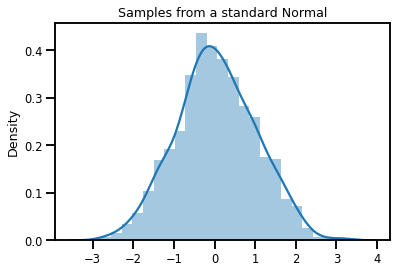

In [9]:
# Plot 1000 samples from a standard normal
samples = normal.sample(1000)
sns.distplot(samples)
plt.title("Samples from a standard Normal")
plt.show()

### Vectorization

> Vectorization makes things fast!

In [10]:
mats = tf.random.uniform(shape=[1000, 10, 10])
vecs = tf

In [11]:
# Compute the log_prob of a point in the event space of `normal`
normal.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [12]:
# Compute the log_prob of a few points
normal.log_prob([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4189385, -0.9189385, -1.4189385], dtype=float32)>

In [13]:
# Create a batch of 3 normals, and plot 1000 samples from each
normals = tfd.Normal([-2.5, 0., 2.5], 1.)  # The scale parameter broadacasts!
print("Batch shape:", normals.batch_shape)
print("Event shape:", normals.event_shape)

Batch shape: (3,)
Event shape: ()


In [14]:
# Samples' shapes go on the left!
samples = normals.sample(1000)
print("Shape of samples:", samples.shape)

Shape of samples: (1000, 3)


In [15]:
# Sample shapes can themselves be more complicated
print("Shape of samples:", normals.sample([10, 10, 10]).shape)

Shape of samples: (10, 10, 10, 3)


In [16]:
# A batch of normals gives a batch of log_probs
print(normals.log_prob([-2.5, 0., 2.5]))

tf.Tensor([-0.9189385 -0.9189385 -0.9189385], shape=(3,), dtype=float32)


In [17]:
# Normal numpy-like broadcasting rules apply
xs = np.linspace(-6, 6, 200)
try:
    normals.log_prob(xs)
except Exception as e:
    print("TFP error:", e.message)

TFP error: Incompatible shapes: [200] vs. [3] [Op:SquaredDifference]


In [18]:
# That fails for the same reason this does:
try:
  np.zeros(200) + np.zeros(3)
except Exception as e:
  print("Numpy error:", e)

Numpy error: operands could not be broadcast together with shapes (200,) (3,) 


In [19]:
# But this would work:
a = np.zeros([200, 1]) + np.zeros(3)
print("Broadcast shape:", a.shape)

Broadcast shape: (200, 3)


In [20]:
xs = np.linspace(-6, 6, 200)[..., np.newaxis]
# Check the shape xs.shape=> [200, 1]
lps = normals.log_prob(xs)
print("Broadcast log_prob shape:", lps.shape)

Broadcast log_prob shape: (200, 3)


/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


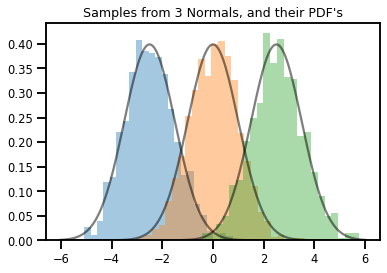

In [21]:
# create a visual
for i in range(3):
  sns.distplot(samples[:, i], kde=False, norm_hist=True)
plt.plot(np.tile(xs, 3), normals.prob(xs), c='k', alpha=.5)
plt.title("Samples from 3 Normals, and their PDF's")
plt.show()

### A Vector-variate Distribution

In [22]:
mvn = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag = [1., 1.])
print("Batch shape:", mvn.batch_shape)
print("Event shape:", mvn.event_shape)

Batch shape: ()
Event shape: (2,)


In [23]:
samples = mvn.sample(1000)
print("Samples shape:", samples.shape)

Samples shape: (1000, 2)


/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


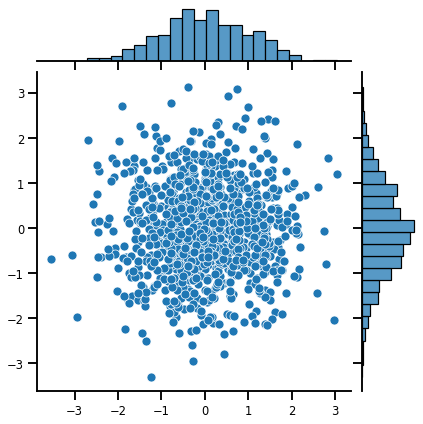

In [24]:
g = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
plt.show()

### A matrix-variate Distribution

In [25]:
lkj = tfd.LKJ(dimension=10, concentration=[1.5, 3.0])
print("Batch shape: ", lkj.batch_shape)
print("Event shape: ", lkj.event_shape)

Batch shape:  (2,)
Event shape:  (10, 10)


In [26]:
# samples = lkj.sample()
# print("Samples shape: ", samples.shape)

In [27]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
# sns.heatmap(samples[0, ...], ax=axes[0], cbar=False)
# sns.heatmap(samples[1, ...], ax=axes[1], cbar=False)
# fig.tight_layout()
# plt.show()

### Gaussian Process

In [28]:
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
xs = np.linspace(-5., 5., 200).reshape([-1, 1])
gp = tfd.GaussianProcess(kernel, index_points=xs)
print("Batch shape:", gp.batch_shape)
print("Event shape:", gp.event_shape)

Batch shape: ()
Event shape: (200,)


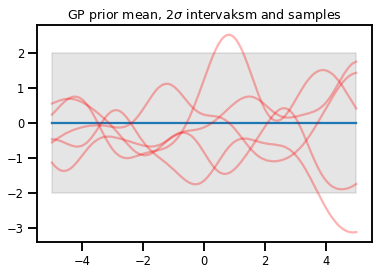

In [29]:
upper, lower = gp.mean() + [2*gp.stddev(), -2*gp.stddev()]
plt.plot(xs, gp.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)

for _ in range(5):
    plt.plot(xs, gp.sample(), c='r', alpha=.3)
plt.title(r"GP prior mean, $2\sigma$ intervaksm and samples")
plt.show()

### GP Regression

In [30]:
# Take some observed data as below
obs_x =[[-3.], [0.], [2.]] # Shape 3x1 ( 3 1-D vectors)
obs_y = [3., -2., 2.] # Shape 3 ( 3 scalars)

gprm = tfd.GaussianProcessRegressionModel( kernel, xs, obs_x, obs_y)

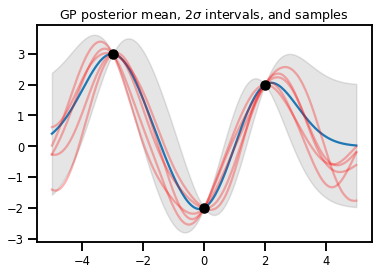

In [31]:
upper, lower = gprm.mean() + [2 * gprm.stddev(), -2 * gprm.stddev()]
plt.plot(xs, gprm.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
for _ in range(5):
  plt.plot(xs, gprm.sample(), c='r', alpha=.3)
plt.scatter(obs_x, obs_y, c='k', zorder=3)
plt.title(r"GP posterior mean, $2\sigma$ intervals, and samples")
plt.show()


## Bijectors

Bijectors represent (mostly) invertible, smooth functions. They can be used to transform distributions, preserving the ability to take samples and compute log_probs. They can be in the `tfp.bijectors` module.

Each bijector implements at least 3 methods: 
  * `forward`,
  * `inverse`, and
  * (at least) one of `forward_log_det_jacobian` and `inverse_log_det_jacobian`.

With these ingredients, we can transform a distribution and still get samples and log probs from the result!

### In Math, somewhat sloppily

* $X$ is a random variable with pdf $p(x)$
* $g$ is a smooth, invertible function on the space of $X$'s
* $Y = g(X)$ is a new, transformed random variable
* $p(Y=y) = p(X=g^{-1}(y)) \cdot |\nabla g^{-1}(y)|$

### Caching
Bijectors also cache the forward and inverse computations, and log-det-Jacobians, which allows us to save
repeating potentially very expensive operations!


In [32]:
print_subclasses_from_module(tfp.bijectors, tfp.bijectors.Bijector)

AbsoluteValue, Affine, AffineLinearOperator, AffineScalar, Ascending
BatchNormalization, Bijector, Blockwise, Chain, CholeskyOuterProduct
CholeskyToInvCholesky, Composition, CorrelationCholesky, Cumsum
DiscreteCosineTransform, Exp, Expm1, FFJORD, FillScaleTriL, FillTriangular
FrechetCDF, GeneralizedExtremeValueCDF, GeneralizedPareto, Glow, GompertzCDF
GumbelCDF, Identity, Inline, Invert, IteratedSigmoidCentered, JointMap
KumaraswamyCDF, LambertWTail, Log, Log1p, MaskedAutoregressiveFlow
MatrixInverseTriL, MatvecLU, MoyalCDF, NormalCDF, Ordered, Pad, Permute, Power
PowerTransform, RationalQuadraticSpline, RayleighCDF, RealNVP, Reciprocal
Reshape, Restructure, Scale, ScaleMatvecDiag, ScaleMatvecLU
ScaleMatvecLinearOperator, ScaleMatvecLinearOperatorBlock, ScaleMatvecTriL
Shift, ShiftedGompertzCDF, Sigmoid, Sinh, SinhArcsinh, SoftClip, Softfloor
SoftmaxCentered, Softplus, Softsign, Split, Square, Tanh, TransformDiagonal
Transpose, WeibullCDF


### A Simple Bijector

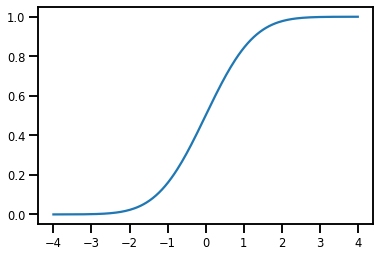

In [33]:
normal_cdf = tfp.bijectors.NormalCDF()
xs = np.linspace(-4., 4., 200)
plt.plot(xs, normal_cdf.forward(xs))
plt.show()

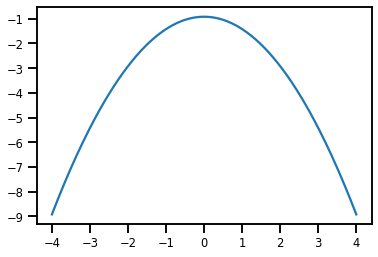

In [34]:
plt.plot(xs, normal_cdf.forward_log_det_jacobian(xs, event_ndims=0))

### A Bijector transforming a Distribution

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


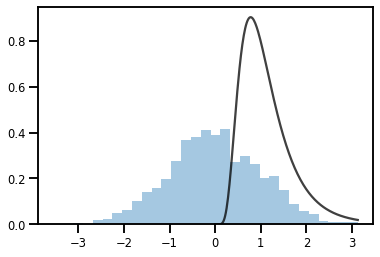

In [35]:
exp_bijector = tfp.bijectors.Exp()
log_normal = exp_bijector(tfd.Normal(0., .5))

sample = log_normal.sample(1000)
xs = np.linspace(1e-10, np.max(samples), 200)
sns.distplot(samples, norm_hist=True, kde=False)
plt.plot(xs, log_normal.prob(xs), c='k', alpha=.75)
plt.show()

### Batching Bisectors

In [36]:
# Create a batch of bijectors of shape [3,]
softplus = tfp.bijectors.Softplus(
  hinge_softness=[1., .5, .1])
print("Hinge softness shape:", softplus.hinge_softness.shape)

Hinge softness shape: (3,)


In [37]:
# For broadcasting, we want this to be shape [200, 1]
xs = np.linspace(-4., 4., 200)[..., np.newaxis]
ys = softplus.forward(xs)
print("Forward shape:", ys.shape)

Forward shape: (200, 3)


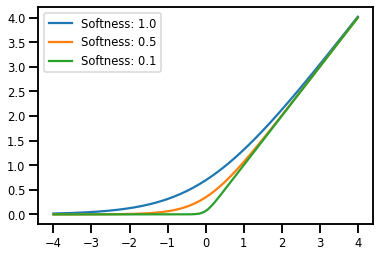

In [38]:
# Visualization
lines = plt.plot(np.tile(xs, 3), ys)
for line, hs in zip(lines, softplus.hinge_softness):
  line.set_label("Softness: %1.1f" % hs)
plt.legend()
plt.show()

### Caching

In [39]:
# This bijector represents a matrix outer product on the forward pass,
# and a cholesky decomposition on the inverse pass. The latter costs O(N^3)!
bij = tfb.CholeskyOuterProduct()

size = 2500
# Make a big, lower-triangular matrix
big_lower_triangular = tf.eye(size)
# Squaring it gives us a positive-definite matrix
big_positive_definite = bij.forward(big_lower_triangular)

# Caching for the win!
%timeit bij.inverse(big_positive_definite)
%timeit tf.linalg.cholesky(big_positive_definite)

161 µs ± 4.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
199 ms ± 3.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Monte-Carlo Algorithm
TFP has built in support for some standard Markov chain Monte Carlo algorithms, including Hamiltonian Monte Carlo.

#### Create a synthetic dataset

In [43]:
def f(x, w):
  # Pad x with 1's so we can add bias via matmul
  x = tf.pad(x, [[1, 0], [0, 0]], constant_values=1)
  linop = tf.linalg.LinearOperatorFullMatrix(w[..., np.newaxis])
  result = linop.matmul(x, adjoint=True)
  return result[..., 0, :]

num_features = 2
num_examples = 50
noise_scale = .5
true_w = np.array([-1., 2., 3.])

xs = np.random.uniform(-1., 1., [num_features, num_examples])
ys = f(xs, true_w) + np.random.normal(0., noise_scale, size=num_examples)

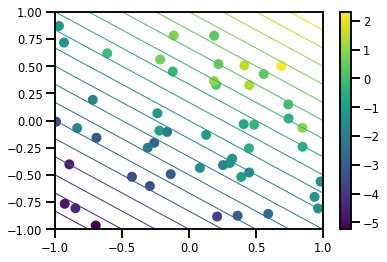

In [44]:
# Visualize the data set
plt.scatter(*xs, c=ys, s=100, linewidths=0)

grid = np.meshgrid(*([np.linspace(-1, 1, 100)] * 2))
xs_grid = np.stack(grid, axis=0)
fs_grid = f(xs_grid.reshape([num_features, -1]), true_w)
fs_grid = np.reshape(fs_grid, [100, 100])
plt.colorbar()
plt.contour(xs_grid[0, ...], xs_grid[1, ...], fs_grid, 20, linewidths=1)
plt.show()

### joint log-prob function

In [45]:
def joint_log_prob(w, x, y):
  # Our model in maths is
  #   w ~ MVN([0, 0, 0], diag([1, 1, 1]))
  #   y_i ~ Normal(w @ x_i, noise_scale),  i=1..N

  rv_w = tfd.MultivariateNormalDiag(
    loc=np.zeros(num_features + 1),
    scale_diag=np.ones(num_features + 1))

  rv_y = tfd.Normal(f(x, w), noise_scale)
  return (rv_w.log_prob(w) +
          tf.reduce_sum(rv_y.log_prob(y), axis=-1))

In [46]:
# Create  unnormalized target density by currying x and y from the joint.
def unnormalized_posterior(w):
  return joint_log_prob(w, xs, ys)

#### Hamilton Monte-Carlo 

In [47]:
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
  target_log_prob_fn=unnormalized_posterior,
  step_size=np.float64(.1),
  num_leapfrog_steps=2)

In [48]:
def run_chain(initial_state, num_results=1000, num_burnin_steps=500):
  return tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_state,
    kernel=hmc_kernel,
    trace_fn=lambda current_state, kernel_results: kernel_results)

In [49]:
initial_state = np.zeros(num_features + 1)
samples, kernel_results = run_chain(initial_state)
print("Acceptance rate:", kernel_results.is_accepted.numpy().mean())

Acceptance rate: 0.913


### Adaptive step sizes

Wrap HMC TransitionKernel in a SimpleStepSizeAdaptation "meta-kernel", which will apply some (rather simple heuristic) logic to adapt the HMC step size during burnin. Allot 80% of burnin for adapting step size, and then let the remaining 20% go just to mixin

In [50]:
def run_chain(initial_state, num_results=1000, num_burnin_steps=500):
  adaptive_kernel = tfp.mcmc.SimpleStepSizeAdaptation(
      hmc_kernel,
      num_adaptation_steps=int(.8 * num_burnin_steps),
      target_accept_prob=np.float64(.65))

  return tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_state,
    kernel=adaptive_kernel,
    trace_fn=lambda cs, kr: kr) 

In [51]:
samples, kernel_results = run_chain(
  initial_state=np.zeros(num_features+1))
print("Acceptance rate:", kernel_results.inner_results.is_accepted.numpy().mean())

Acceptance rate: 0.725


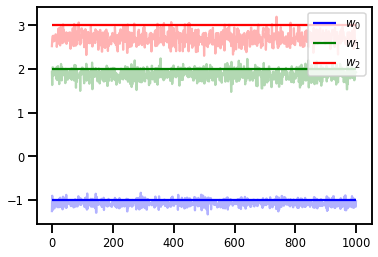

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

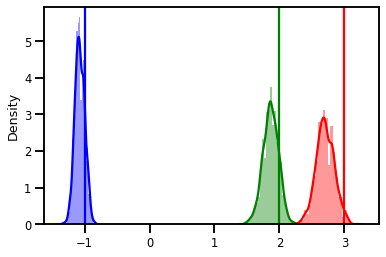

In [52]:
colors = ['b', 'g', 'r']
for i in range(3):
  plt.plot(samples[:, i], c=colors[i], alpha=.3)
  plt.hlines(true_w[i], 0, 1000, zorder=4, color=colors[i], label="$w_{}$".format(i))
plt.legend(loc='upper right')
plt.show()

# Histogram of samples
for i in range(3):
  sns.distplot(samples[:, i], color=colors[i])
ymax = plt.ylim()[1]
for i in range(3):
  plt.vlines(true_w[i], 0, ymax, color=colors[i])
plt.ylim(0, ymax)
plt.show()